<a href="https://colab.research.google.com/github/Nikhil14091997/ML-ZoomCamp/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



```

Data:

https://github.com/gastonstat/CreditScoring

```



In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv


--2021-10-02 12:31:00--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K  --.-KB/s    in 0.009s  

2021-10-02 12:31:01 (18.4 MB/s) - ‘CreditScoring.csv.1’ saved [182489/182489]





```

Preparation
We'll talk about this dataset in more details in week 6. But for now, use the following code to get started```



In [3]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

*Some of the features are encoded as numbers. Use the following code to de-code them:
*

In [4]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [5]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)


Remove clients with unknown default status

In [6]:
df = df[df.status != 'unk'].reset_index(drop=True)


Create the target variable

In [7]:
df['default'] = (df.status == 'default').astype(int)
del df['status']


What are the categorical variables? What are the numerical?

In [8]:
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int64
dtype: object

Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1

In [9]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [10]:
numerical = list(df._get_numeric_data().columns)
numerical

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price',
 'default']

In [11]:
categorical = [i for i in df.columns if df.dtypes[i]=='object']
categorical

['home', 'marital', 'records', 'job']

In [12]:
df['time'].head(10)

0    60
1    60
2    36
3    60
4    36
5    60
6    60
7    12
8    60
9    48
Name: time, dtype: int64

# Question 1


```
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the "default" variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['expenses'])

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.
```



In [13]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [14]:
score_dict = {}
for c in numerical:
  score = roc_auc_score(df_train.default, df_train[c])
  temp = 0
  if score < 0.5:
    temp = roc_auc_score(df_train.default,-df_train[c]).astype(str)
    print("column: " + c + " \t\t\t  auc: " + temp)
  else:
    temp = roc_auc_score(df_train.default,df_train[c]).astype(str)
    print("column: " + c + " \t\t\t  auc: " + temp)
  score_dict[c] = temp

print("priting dictionary : ")
print(score_dict)

column: seniority 			  auc: 0.7093778624491943
column: time 			  auc: 0.5608662489595051
column: age 			  auc: 0.5732933272499939
column: expenses 			  auc: 0.5009184217217011
column: income 			  auc: 0.682006666132633
column: assets 			  auc: 0.6486042567122802
column: debt 			  auc: 0.5047829675783548
column: amount 			  auc: 0.5910773431595518
column: price 			  auc: 0.5043329862114843
column: default 			  auc: 1.0
priting dictionary : 
{'seniority': '0.7093778624491943', 'time': '0.5608662489595051', 'age': '0.5732933272499939', 'expenses': '0.5009184217217011', 'income': '0.682006666132633', 'assets': '0.6486042567122802', 'debt': '0.5047829675783548', 'amount': '0.5910773431595518', 'price': '0.5043329862114843', 'default': '1.0'}




```
Which numerical variable (among the following 4) has the highest AUC?

seniority
time
income
debt
```



In [15]:
print(score_dict['seniority'])
print(score_dict['time'])
print(score_dict['income'])
print(score_dict['debt'])


0.7093778624491943
0.5608662489595051
0.682006666132633
0.5047829675783548


Highest Score is for : seniority



```
Training the model
From now on, use these columns only:

['seniority', 'income', 'assets', 'records', 'job', 'home']
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

```



In [16]:
# From now on, use these columns only:
# ['seniority', 'income', 'assets', 'records', 'job', 'home']
features = ['seniority', 'income', 'assets', 'records', 'job', 'home']



In [17]:
from sklearn.feature_extraction import DictVectorizer
# Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:
dicts = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_val_features = df_val[features].to_dict(orient='records')
X_train = dv.fit_transform(dicts)
X_val = dv.fit_transform(X_val_features)
# LogisticRegression(solver='liblinear', C=1.0, max_iter=1000
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, max_iter=1000, solver='liblinear')
y_train = df_train.default.values
y_val = df_val.default.values
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
print(roc_auc_score(y_val, y_pred))

0.8120879813449298


# Question 2

```
What's the AUC of this model on the validation dataset? (round to 3 digits)

0.512
0.612
0.712
0.812
```





Answer : 0.812

#  Question 3


```
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall
Plot them
```



In [18]:
thresholds = np.linspace(0,1,101)
print(thresholds)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


In [19]:
chart = []
for t in thresholds:
  print('For t = ', t)
  pos = (y_val == 1)
  print('Actual Positive = ', pos.sum())
  neg = (y_val == 0)
  print('Actual Negative = ', neg.sum())
  pred_pos = (y_pred >= t)
  print('Predicted Positive = ', pred_pos.sum())
  pred_neg = (y_pred < t)
  print('Predicted Negative = ', pred_neg.sum())
  tp = (pred_pos & pos).sum()
  print("True Positive = ", tp)
  tn = (pred_neg & neg).sum()
  print("True Negative = ", tn)
  fp = (pred_pos & neg).sum()
  print("False Positive = ", fp)
  fn = (pred_neg & pos).sum()
  print("False Negative = ", fn)

  precision = tp / (tp + fp)
  print("Precision = ", precision)
  recall = tp / (tp + fn)
  print("Recall = ", recall)
  f1 = (2 * precision * recall)/(precision + recall)
  print("F1 = ", f1, '\n\n\n\n\n')
  chart.append([t, precision, recall, f1])
  #print('For t = ', t, ' Precision is :', precision, " and Recall is :", recall)

For t =  0.0
Actual Positive =  246
Actual Negative =  645
Predicted Positive =  891
Predicted Negative =  0
True Positive =  246
True Negative =  0
False Positive =  645
False Negative =  0
Precision =  0.2760942760942761
Recall =  1.0
F1 =  0.43271767810026385 





For t =  0.01
Actual Positive =  246
Actual Negative =  645
Predicted Positive =  881
Predicted Negative =  10
True Positive =  246
True Negative =  10
False Positive =  635
False Negative =  0
Precision =  0.2792281498297389
Recall =  1.0
F1 =  0.4365572315882875 





For t =  0.02
Actual Positive =  246
Actual Negative =  645
Predicted Positive =  857
Predicted Negative =  34
True Positive =  244
True Negative =  32
False Positive =  613
False Negative =  2
Precision =  0.2847141190198366
Recall =  0.991869918699187
F1 =  0.442429737080689 





For t =  0.03
Actual Positive =  246
Actual Negative =  645
Predicted Positive =  835
Predicted Negative =  56
True Positive =  242
True Negative =  52
False Positive =  593
Fa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


     threshold  precision   recall        f1
0         0.00   0.276094  1.00000  0.432718
1         0.01   0.279228  1.00000  0.436557
2         0.02   0.284714  0.99187  0.442430
3         0.03   0.289820  0.98374  0.447734
4         0.04   0.300621  0.98374  0.460514
..         ...        ...      ...       ...
96        0.96        NaN  0.00000       NaN
97        0.97        NaN  0.00000       NaN
98        0.98        NaN  0.00000       NaN
99        0.99        NaN  0.00000       NaN
100       1.00        NaN  0.00000       NaN

[101 rows x 4 columns]


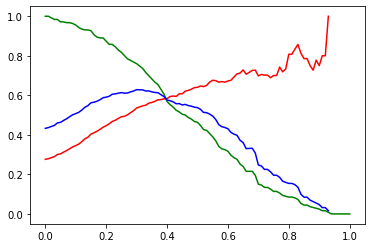

In [20]:
df_scores = pd.DataFrame(chart, columns = ['threshold', 'precision', 'recall', 'f1'])
print(df_scores)
plt.plot(df_scores.threshold, df_scores.precision, label = 'precision', color = 'red')
plt.plot(df_scores.threshold, df_scores.recall, label = 'recall', color = 'green')
plt.plot(df_scores.threshold, df_scores.f1, label = 'f1', color = 'blue')

In [21]:
plt.show()

Looks like the intersection is at 0.4

# Question 4
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01



```
At which threshold F1 is maximal?

0.1
0.3
0.5
0.7
```



The answer seems to be : 0.3

# Question 5


```
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)

Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
Use AUC to evaluate the model on validation
```



In [22]:
def train(df_train, y_train, C=1.0):
    dicts = df_train.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver ='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [23]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [24]:
!pip install tqdm

In [25]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
counter = 1
scores = []
for train_idx, val_idx in kfold.split(df_full_train):
  print("For Iteration : ", counter , " start")
  df_train = df_full_train.iloc[train_idx]
  df_val = df_full_train.iloc[val_idx]
  print("Fold of train/test built")
  y_train = df_train.default.values
  y_val = df_val.default.values

  dv, model = train(df_train[features], y_train, C=1)
  print("Model Trained")
  y_pred = predict(df_val[features], dv, model)
  print("Model Scored")

  auc = roc_auc_score(y_val, y_pred)
  print("The score for :", counter , " is = ", auc)
  scores.append(auc)
  print("The iteration :", counter, " ends. \n\n\n")
  counter += 1

std_dev = np.std(scores)
print(np.mean(scores))
print("Std Dev : ", np.round(std_dev, 3))

For Iteration :  1  start
Fold of train/test built
Model Trained
Model Scored
The score for : 1  is =  0.8256212256212256
The iteration : 1  ends. 



For Iteration :  2  start
Fold of train/test built
Model Trained
Model Scored
The score for : 2  is =  0.8254077031563474
The iteration : 2  ends. 



For Iteration :  3  start
Fold of train/test built
Model Trained
Model Scored
The score for : 3  is =  0.789298525308888
The iteration : 3  ends. 



For Iteration :  4  start
Fold of train/test built
Model Trained
Model Scored
The score for : 4  is =  0.8153421373265731
The iteration : 4  ends. 



For Iteration :  5  start
Fold of train/test built
Model Trained
Model Scored
The score for : 5  is =  0.8054696294614563
The iteration : 5  ends. 



0.812227844174898
Std Dev :  0.014




```
How large is standard devidation of the AUC scores across different folds?

0.001
0.014
0.09
0.14

```



Answer : 0.014

# Question 6


```
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: [0.01, 0.1, 1, 10]
Initialize KFold with the same parameters as previously
Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
Compute the mean score as well as the std (round the mean and std to 3 decimal digits)
```



In [26]:
from tqdm.auto import tqdm
C = [0.01, 0.1, 1, 10]

for c in C:
  kfold = KFold(n_splits=5, shuffle=True, random_state=1)
  c_scores = []
  for train_idx, val_idx in tqdm(kfold.split(df_full_train)):

    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train[features], y_train, c)
    y_pred = predict(df_val[features], dv, model)

    auc = roc_auc_score(y_val, y_pred)
    c_scores.append(auc)

    #print("For C = ", c , " AUC = ", auc)

  mean_c = np.mean(c_scores)
  std_dev_c = np.std(c_scores)

  print('\n\n')
  print('For C = ', c)
  print("Mean of C-Scores is : ", np.round(mean_c, 3))
  print("Std - Dev of C-Scores is : ", np.round(std_dev_c, 3), "\n\n\n\n")


0it [00:00, ?it/s]




For C =  0.01
Mean of C-Scores is :  0.808
Std - Dev of C-Scores is :  0.012 






0it [00:00, ?it/s]




For C =  0.1
Mean of C-Scores is :  0.813
Std - Dev of C-Scores is :  0.014 






0it [00:00, ?it/s]




For C =  1
Mean of C-Scores is :  0.812
Std - Dev of C-Scores is :  0.014 






0it [00:00, ?it/s]




For C =  10
Mean of C-Scores is :  0.814
Std - Dev of C-Scores is :  0.015 








```
Which C leads to the best mean score?

0.01
0.1
1
10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C
```



Answer : 0.1